# Prerequisites
- Python 3
- Python jupyter module
- Python clearml module
- [Cuda 12.3](https://developer.nvidia.com/cuda-downloads)

# Set ENV vars

In [3]:
%env CLEARML_WEB_HOST=http://clearml.ad.ai.sdl.com:8080
%env CLEARML_API_HOST=http://clearml.ad.ai.sdl.com:8008
%env CLEARML_FILES_HOST=http://clearml.ad.ai.sdl.com:8081
%env CLEARML_API_ACCESS_KEY=SKXA1SPMCLDW7NH3JG5F
%env CLEARML_API_SECRET_KEY=bMKqfrJnZOWTIJEgnYVfBSncCub4XBPxGYhspwitWFmREfYKUe

env: CLEARML_WEB_HOST=http://clearml.ad.ai.sdl.com:8080
env: CLEARML_API_HOST=http://clearml.ad.ai.sdl.com:8008
env: CLEARML_FILES_HOST=http://clearml.ad.ai.sdl.com:8081
env: CLEARML_API_ACCESS_KEY=SKXA1SPMCLDW7NH3JG5F
env: CLEARML_API_SECRET_KEY=bMKqfrJnZOWTIJEgnYVfBSncCub4XBPxGYhspwitWFmREfYKUe


# Create dataset

In [4]:
from clearml import Dataset
dataset = Dataset.create(
  dataset_name='kaggle_sarcasm',
  dataset_project='sarcasm_detector',
  dataset_version="1.0",
  description='From https://www.kaggle.com/datasets/danofer/sarcasm'
)

ClearML results page: http://clearml.ad.ai.sdl.com:8080/projects/8a6652a3459a4983a8c155b42f5af4bf/experiments/6185cd6d59e849279e373eca8ca6d90d/output/log
ClearML dataset page: http://clearml.ad.ai.sdl.com:8080/datasets/simple/8a6652a3459a4983a8c155b42f5af4bf/experiments/6185cd6d59e849279e373eca8ca6d90d


# Upload files

In [5]:
dataset.add_files("data")
dataset.upload()
dataset.finalize()

Generating SHA2 hash for 2 files


100%|██████████| 2/2 [00:00<00:00,  8.78it/s]


Hash generation completed
Uploading dataset changes (2 files compressed to 28.69 MiB) to http://clearml.ad.ai.sdl.com:8081
File compression and upload completed: total size 28.69 MiB, 1 chunk(s) stored (average size 28.69 MiB)


True

# Start sklearn training

ClearML Task: created new task id=f447cde2976d4ea3a0438d48da27d950
ClearML results page: http://clearml.ad.ai.sdl.com:8080/projects/a46a2f49fb1a4d01af3ec65a455fe6c3/experiments/f447cde2976d4ea3a0438d48da27d950/output/log


Using custom data configuration default-67dae1169a58f982


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

C:\Users\Andrew\PycharmProjects\sarcasm_detector\venv\Lib\site-packages\datasets\download\streaming_download_manager.py:727: FutureWarning:

the 'mangle_dupe_cols' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'mangle_dupe_cols'

C:\Users\Andrew\PycharmProjects\sarcasm_detector\venv\Lib\site-packages\datasets\download\streaming_download_manager.py:727: FutureWarning:

the 'mangle_dupe_cols' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'mangle_dupe_cols'



Dataset csv downloaded and prepared to C:/Users/Andrew/.cache/huggingface/datasets/csv/default-67dae1169a58f982/0.0.0/6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/203 [00:00<?, ?ba/s]

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    1.8s finished


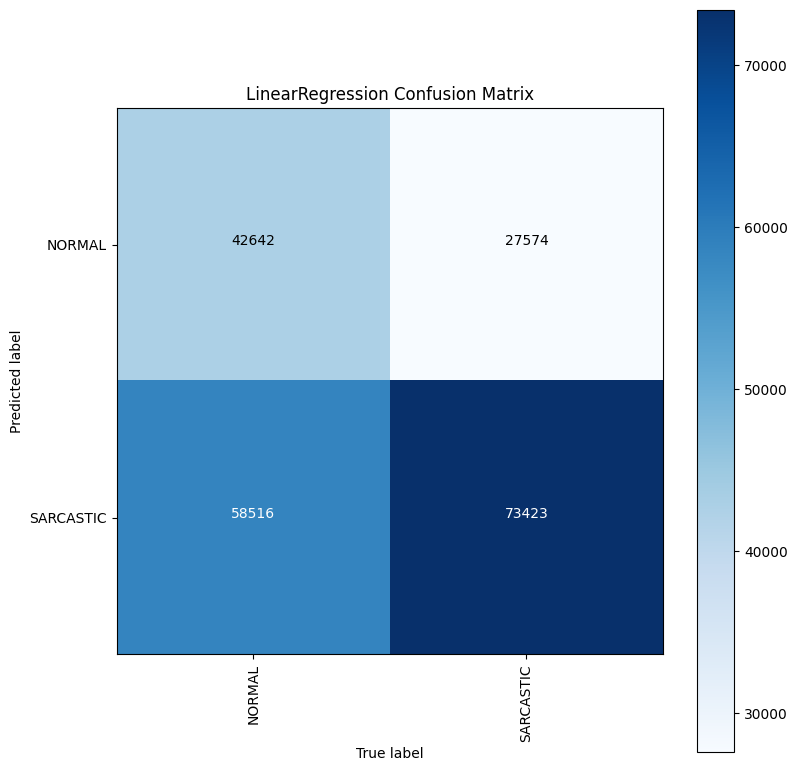

In [6]:
from train.train_sklearn import SklearnTrainer

sarcasm_sk_trainer = SklearnTrainer(subset_size=1000)
sarcasm_sk_trainer.train()
sarcasm_sk_trainer.task.close()

# Check pytorch versions
If requirements.txt isn't installing torch with cuda, try running this, however, the pytorch repo connection is unstable:
%python -m pip uninstall torch torchvision torchaudio
%python -m pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

In [7]:
import torch

print(f'PyTorch version: {torch.__version__}')
print('*'*10)
print(f'_CUDA version: ')
!nvcc --version
print('*'*10)
print(f'CUDNN version: {torch.backends.cudnn.version()}')
print(f'Available GPU devices: {torch.cuda.device_count()}')
print(f'Device Name: {torch.cuda.get_device_name()}')

PyTorch version: 2.1.0+cu121
**********
_CUDA version: 
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Fri_Sep__8_19:56:38_Pacific_Daylight_Time_2023
Cuda compilation tools, release 12.3, V12.3.52
Build cuda_12.3.r12.3/compiler.33281558_0
**********
CUDNN version: 8801
Available GPU devices: 1
Device Name: NVIDIA GeForce RTX 3060 Ti


# Train transformer

In [ ]:
from train.train_transformer import SarcasmTrainer

sarcasm_tfr_trainer = SarcasmTrainer(subset_size=1000)
sarcasm_tfr_trainer.train()
sarcasm_tfr_trainer.task.close()

ClearML Task: created new task id=7b09b4ca296e46fea609168d3ba19d7f
ClearML results page: http://clearml.ad.ai.sdl.com:8080/projects/a46a2f49fb1a4d01af3ec65a455fe6c3/experiments/7b09b4ca296e46fea609168d3ba19d7f/output/log


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'classifier.bias', 'classifier.weight', 'pre_classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Using custom data configuration default-67dae1169a58f982
Found cached dataset csv (C:/Users/Andrew/.cache/huggingface/datasets/csv/default-67dae1169a58f982/0.0.0/6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317)
Loading cached split indices for dataset at C:\Users\Andrew\.cache\huggingface\datasets\csv\default-67dae1169a58f982\0.0.0\6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317\cache-6396c3bb4ed28c2e.arrow and C:\Users\Andrew\.cache\huggingface\datasets\csv\default-67dae1169a58f982\0.0.0\6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317\cache-9fe8bfcda3bfd0fd.arrow


  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/203 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/203 [00:00<?, ?ba/s]

C:\Users\Andrew\PycharmProjects\sarcasm_detector\venv\Lib\site-packages\transformers\training_args.py:1711: FutureWarning:

`--push_to_hub_token` is deprecated and will be removed in version 5 of 🤗 Transformers. Use `--hub_token` instead.



Training with params: TrainingArguments(
_n_gpu=1,
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
auto_find_batch_size=False,
bf16=False,
bf16_full_eval=False,
data_seed=None,
dataloader_drop_last=False,
dataloader_num_workers=0,
dataloader_pin_memory=True,
ddp_backend=None,
ddp_broadcast_buffers=None,
ddp_bucket_cap_mb=None,
ddp_find_unused_parameters=None,
ddp_timeout=1800,
debug=[],
deepspeed=None,
disable_tqdm=False,
dispatch_batches=None,
do_eval=True,
do_predict=False,
do_train=False,
eval_accumulation_steps=None,
eval_delay=0,
eval_steps=None,
evaluation_strategy=IntervalStrategy.EPOCH,
fp16=False,
fp16_backend=auto,
fp16_full_eval=False,
fp16_opt_level=O1,
fsdp=[],
fsdp_config={'min_num_params': 0, 'xla': False, 'xla_fsdp_grad_ckpt': False},
fsdp_min_num_params=0,
fsdp_transformer_layer_cls_to_wrap=None,
full_determinism=False,
gradient_accumulation_steps=1,
gradient_checkpointing=False,
greater_is_better=False,
group_by_length=False,
half_precision_back

You're using a DistilBertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss


ClearML Monitor: Could not detect iteration reporting, falling back to iterations as seconds-from-start
ClearML Monitor: Reporting detected, reverting back to iteration based reporting
